In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


c:\Users\thira\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
df=pd.read_excel("C:/Users/thira/Downloads/Grade_CS_Students (1).xlsx",na_values=['NA'])
df=df.drop(['Year of enrolment', 'ID'], axis=1)
#replace all the missing values with the mean of the column
#df_cleaned=df.fillna(df.mean(),axis=1, inplace=True)
columns=df.columns
df.fillna(0, inplace=True)
# for col in columns:
#     df[col] = pd.to_numeric(df[col], errors='coerce')
#     df.fillna({col: df[col].mean()}, inplace=True)
  
# df.fillna({'MA112':df['MA112'].mean()}, inplace=True)
# Convert scores into grades

def encode_grade(marks):
    if marks > 85:
        return 1  #'A+'
    elif 80 <= marks <= 85:
        return 2  #'A'
    elif 75 <= marks < 80:
        return 3  #'A-'
    elif 70 <= marks < 75:
        return 4  #'B+'
    elif 65 <= marks < 70:
        return 5  #'B'
    elif 60 <= marks < 65:
        return 6  #'B-'
    elif 55 <= marks < 60:
        return 7  #'C+'
    elif 50 <= marks < 55:
        return 8  #'C'
    elif 45 <= marks < 50:
        return 9  #'C-'
    elif 40 <= marks < 45:
        return 10 #'D+'
    elif 35 <= marks < 40:
        return 11 #'D'
    else:
        return 0 #'E'

df = df.map(encode_grade)
df.head()

,CS101,CS102,MA101,MA112,MA121,GS101,GS102,PH101,PH102,PH103,...,CS507,CS508,CS509,CS510,CS512,CS597,CS598,MA419,SW499,MM507
0,10,8,10,0,10,10,7,10,10,0,...,8,10,5,9,10,6,4,7,6,0
1,10,10,9,0,10,9,9,10,8,10,...,10,10,9,10,10,6,4,5,4,0
2,8,3,9,0,10,9,8,10,9,10,...,8,10,5,10,10,6,3,6,5,0
3,10,10,10,0,10,10,10,10,10,9,...,10,7,7,10,10,5,6,9,5,0
4,8,8,8,0,10,5,8,10,10,10,...,8,10,10,6,10,6,4,8,5,0


In [4]:
correlation_matrix = df.corr()

# Print the correlation matrix
#print(correlation_matrix)
# Create a heatmap
first_column = df.columns[0]
correlations_with_first_column = correlation_matrix[first_column].drop(first_column)
# Sort the correlations in descending order and select the top 10
top_10_correlations = correlations_with_first_column.sort_values(ascending=False).head(10)

# Print the top 10 correlated columns
print(top_10_correlations)

# # Step 5: Plot the bar chart
# plt.figure(figsize=(10, 6))
# sns.barplot(x=correlations_with_first_column.index, y=correlations_with_first_column.values)
# plt.title(f'Correlation of All Other Columns with {first_column}')
# plt.xlabel('Columns')
# plt.ylabel('Correlation')
# plt.xticks(rotation=45)
# plt.show()

ST112    0.425057
ST111    0.393635
CS312    0.383178
CS308    0.362730
SW499    0.357489
OR201    0.350810
MA101    0.347250
CS202    0.335568
CS204    0.335482
CS306    0.332218
Name: CS101, dtype: float64


In [10]:
for column in df.columns:
    correlations_with_column = correlation_matrix[column].drop(column)
    top_10_correlations = correlations_with_column.sort_values(ascending=False).head(10)
    print(f'\nTop 10 correlations with {column}:')
    print(top_10_correlations)


Top 10 correlations with CS101:
ST112    0.425057
ST111    0.393635
CS312    0.383178
CS308    0.362730
SW499    0.357489
OR201    0.350810
MA101    0.347250
CS202    0.335568
CS204    0.335482
CS306    0.332218
Name: CS101, dtype: float64

Top 10 correlations with CS102:
OR201    0.414759
CS301    0.385021
ST112    0.379275
CS504    0.333544
ST204    0.305966
ST111    0.286724
OR202    0.282539
CS101    0.279524
ST121    0.273393
CS509    0.269323
Name: CS102, dtype: float64

Top 10 correlations with MA101:
MA211    0.624922
ST111    0.546904
ST112    0.515604
MA201    0.483922
CS312    0.481412
MA212    0.461064
OR201    0.454254
PH101    0.451825
CS308    0.450542
ST211    0.449019
Name: MA101, dtype: float64

Top 10 correlations with MA112:
MM507    0.566919
CS302    0.340608
CS307    0.257870
CS504    0.217646
ST203    0.211460
ST122    0.173966
CS301    0.160432
GS202    0.145710
GS102    0.144432
CS202    0.143540
Name: MA112, dtype: float64

Top 10 correlations with MA121:
ST2

Training Accuracy: 1.00
Testing Accuracy: 0.44


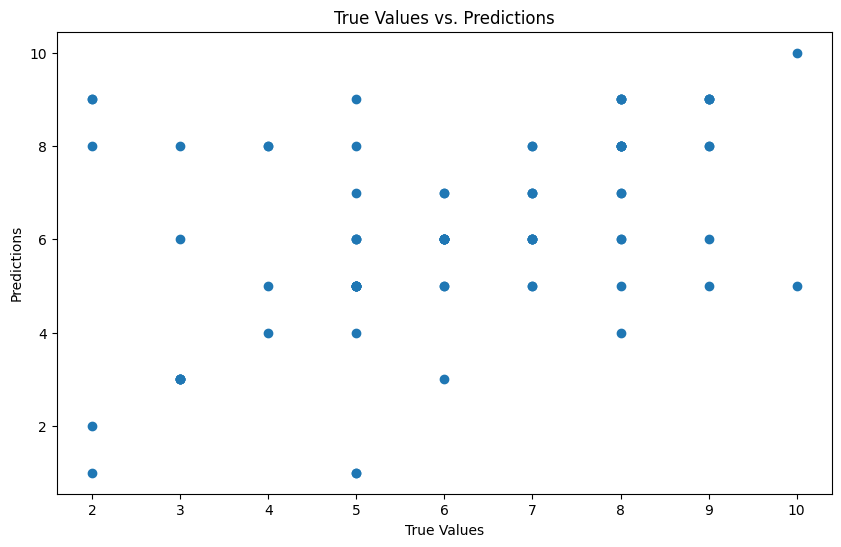

In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score



# Feature selection (previous year subjects) and target variable (fifth-year subjects)
features = df.drop(['CS501','CS502','CS503','CS504','CS505','CS506','CS507','CS508','CS509','CS510','CS512','CS597','CS598','MM507'], axis=1)
target = df['CS502']

#features.head()
# target.head()

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.25, random_state=0)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Create and train MLP model
mlp = MLPClassifier(hidden_layer_sizes=(70,100), max_iter=500)
mlp.fit(X_train_scaled, y_train)

# Evaluate model
train_accuracy = accuracy_score(y_train, mlp.predict(X_train_scaled))
test_accuracy = accuracy_score(y_test, mlp.predict(X_test_scaled))
print(f'Training Accuracy: {train_accuracy:.2f}')
print(f'Testing Accuracy: {test_accuracy:.2f}')

#plotthe Y-test and Y-predicted
plt.figure(figsize=(10, 6))
plt.scatter(y_test, mlp.predict(X_test_scaled))
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('True Values vs. Predictions')
plt.show()



In [24]:
# Define the parameter grid
param_grid = {
    'hidden_layer_sizes': [
        (50,), 
        (100,), 
        (100, 50), 
        (100, 50, 25),
        (200, 100, 50),
        (50, 25)
    ],
    'max_iter': [200, 500],
    'alpha': [0.0001, 0.001, 0.01],  # Regularization parameter
    'learning_rate_init': [0.0001,0.001, 0.01,0.1]  # Initial learning rate
}

# Create the MLP model
mlp = MLPClassifier(random_state=0)

# Use GridSearchCV to search for the best parameters
grid_search = GridSearchCV(mlp, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

# Print the best parameters and best score
print(f'Best parameters found: {grid_search.best_params_}')
print(f'Best cross-validation accuracy: {grid_search.best_score_:.2f}')

# Evaluate the best model on the test set
best_mlp = grid_search.best_estimator_
test_accuracy = accuracy_score(y_test, best_mlp.predict(X_test_scaled))
print(f'Test accuracy: {test_accuracy:.2f}')

c:\Users\thira\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


Best parameters found: {'alpha': 0.0001, 'hidden_layer_sizes': (100,), 'learning_rate_init': 0.001, 'max_iter': 500}
Best cross-validation accuracy: 0.37
Test accuracy: 0.42


In [31]:
#for all final year subjects


import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

def optimize_mlp_for_target(df, target_column,drop_columns):
    # Feature selection (drop the target column from features)
    features = df.drop(drop_columns, axis=1)
    target = df[target_column]

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.25, random_state=0)

    # Standardize features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Define the parameter grid
    param_grid = {
        'hidden_layer_sizes': [
            (50,), 
            (100,), 
            (100, 50), 
            (100, 50, 25),
            (200, 100, 50),
            (50, 25)
        ],
        'max_iter': [200, 500],
        'alpha': [0.0001, 0.001, 0.01],  # Regularization parameter
        'learning_rate_init': [0.0001, 0.001, 0.01, 0.1]  # Initial learning rate
    }

    # Create the MLP model
    mlp = MLPClassifier(random_state=0)

    # Use GridSearchCV to search for the best parameters
    grid_search = GridSearchCV(mlp, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train_scaled, y_train)

    # Print the best parameters and best score
    print(f'Best parameters found for {target_column}: {grid_search.best_params_}')
    print(f'Best cross-validation accuracy for {target_column}: {grid_search.best_score_:.2f}')

    # Evaluate the best model on the test set
    best_mlp = grid_search.best_estimator_
    test_accuracy = accuracy_score(y_test, best_mlp.predict(X_test_scaled))
    print(f'Test accuracy for {target_column}: {test_accuracy:.2f}')

    return test_accuracy




# Convert scores into grades

def encode_grade(marks):
    if marks > 85:
        return 1  #'A+'
    elif 80 <= marks <= 85:
        return 2  #'A'
    elif 75 <= marks < 80:
        return 3  #'A-'
    elif 70 <= marks < 75:
        return 4  #'B+'
    elif 65 <= marks < 70:
        return 5  #'B'
    elif 60 <= marks < 65:
        return 6  #'B-'
    elif 55 <= marks < 60:
        return 7  #'C+'
    elif 50 <= marks < 55:
        return 8  #'C'
    elif 45 <= marks < 50:
        return 9  #'C-'
    elif 40 <= marks < 45:
        return 10 #'D+'
    elif 35 <= marks < 40:
        return 11 #'D'
    else:
        return 0 #'E'
    

df=pd.read_excel("C:/Users/thira/Downloads/Grade_CS_Students (1).xlsx",na_values=['NA'])
df=df.drop(['Year of enrolment', 'ID'], axis=1)
fifth_year_subjects = ['CS501', 'CS502', 'CS503', 'CS504', 'CS505', 'CS506', 'CS507', 'CS508', 'CS509', 'CS510', 'CS512', 'CS597', 'CS598']

#dropping MA112 beacuse of more elements are NaN. Need to find a better way to handle missing values
df=df.drop(['MA112', 'MM507'], axis=1)
columns=df.columns
df.fillna(0, inplace=True)

df = df.map(encode_grade)
df.head()

# Run the optimization for each fifth-year subject
accuracies = {}
for subject in fifth_year_subjects:
    
    accuracies[subject] = optimize_mlp_for_target(df, subject,drop_columns=fifth_year_subjects)

# Print all accuracies
for subject, accuracy in accuracies.items():
    print(f'{subject}: {accuracy:.2f}')


c:\Users\thira\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\thira\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\thira\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


Best parameters found for CS501: {'alpha': 0.0001, 'hidden_layer_sizes': (50,), 'learning_rate_init': 0.001, 'max_iter': 500}
Best cross-validation accuracy for CS501: 0.45
Test accuracy for CS501: 0.54
Best parameters found for CS502: {'alpha': 0.0001, 'hidden_layer_sizes': (100,), 'learning_rate_init': 0.001, 'max_iter': 500}
Best cross-validation accuracy for CS502: 0.38
Test accuracy for CS502: 0.40


c:\Users\thira\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Best parameters found for CS503: {'alpha': 0.0001, 'hidden_layer_sizes': (100,), 'learning_rate_init': 0.001, 'max_iter': 500}
Best cross-validation accuracy for CS503: 0.50
Test accuracy for CS503: 0.45


c:\Users\thira\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


Best parameters found for CS504: {'alpha': 0.01, 'hidden_layer_sizes': (100, 50, 25), 'learning_rate_init': 0.001, 'max_iter': 500}
Best cross-validation accuracy for CS504: 0.39
Test accuracy for CS504: 0.45


c:\Users\thira\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


Best parameters found for CS505: {'alpha': 0.0001, 'hidden_layer_sizes': (100,), 'learning_rate_init': 0.001, 'max_iter': 500}
Best cross-validation accuracy for CS505: 0.42
Test accuracy for CS505: 0.40
Best parameters found for CS506: {'alpha': 0.0001, 'hidden_layer_sizes': (100,), 'learning_rate_init': 0.001, 'max_iter': 500}
Best cross-validation accuracy for CS506: 0.38
Test accuracy for CS506: 0.37


c:\Users\thira\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


Best parameters found for CS507: {'alpha': 0.0001, 'hidden_layer_sizes': (50, 25), 'learning_rate_init': 0.001, 'max_iter': 500}
Best cross-validation accuracy for CS507: 0.38
Test accuracy for CS507: 0.43


c:\Users\thira\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Best parameters found for CS508: {'alpha': 0.0001, 'hidden_layer_sizes': (100, 50), 'learning_rate_init': 0.001, 'max_iter': 500}
Best cross-validation accuracy for CS508: 0.43
Test accuracy for CS508: 0.46


c:\Users\thira\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Best parameters found for CS509: {'alpha': 0.001, 'hidden_layer_sizes': (100,), 'learning_rate_init': 0.001, 'max_iter': 500}
Best cross-validation accuracy for CS509: 0.41
Test accuracy for CS509: 0.37


c:\Users\thira\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Best parameters found for CS510: {'alpha': 0.0001, 'hidden_layer_sizes': (100,), 'learning_rate_init': 0.001, 'max_iter': 500}
Best cross-validation accuracy for CS510: 0.41
Test accuracy for CS510: 0.43


c:\Users\thira\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Best parameters found for CS512: {'alpha': 0.0001, 'hidden_layer_sizes': (100,), 'learning_rate_init': 0.001, 'max_iter': 500}
Best cross-validation accuracy for CS512: 0.40
Test accuracy for CS512: 0.44


c:\Users\thira\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Best parameters found for CS597: {'alpha': 0.0001, 'hidden_layer_sizes': (100, 50), 'learning_rate_init': 0.001, 'max_iter': 500}
Best cross-validation accuracy for CS597: 0.52
Test accuracy for CS597: 0.51


c:\Users\thira\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Best parameters found for CS598: {'alpha': 0.001, 'hidden_layer_sizes': (200, 100, 50), 'learning_rate_init': 0.0001, 'max_iter': 500}
Best cross-validation accuracy for CS598: 0.53
Test accuracy for CS598: 0.62
CS501: 0.54
CS502: 0.40
CS503: 0.45
CS504: 0.45
CS505: 0.40
CS506: 0.37
CS507: 0.43
CS508: 0.46
CS509: 0.37
CS510: 0.43
CS512: 0.44
CS597: 0.51
CS598: 0.62


c:\Users\thira\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


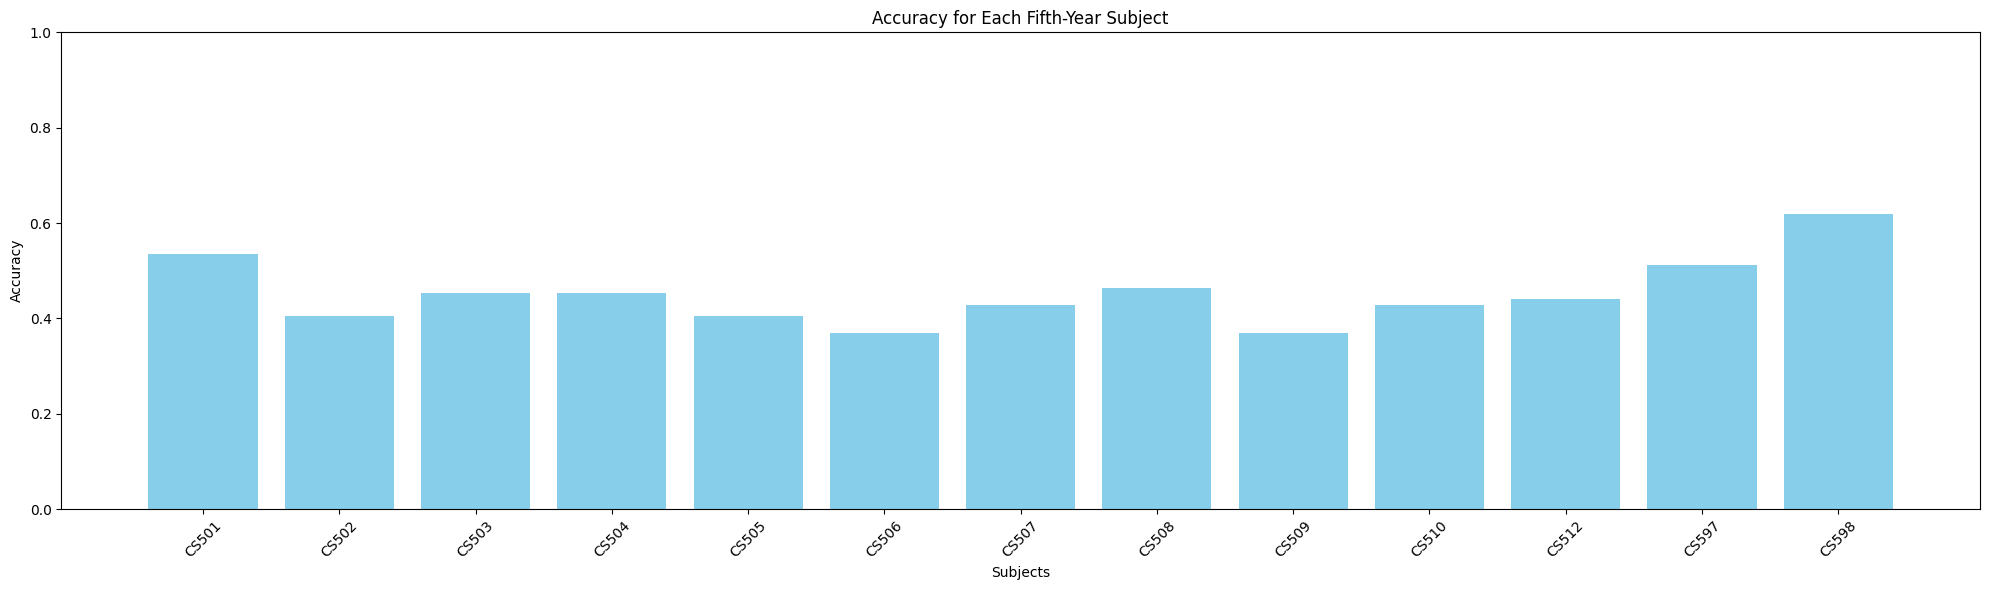

In [32]:
# Extract subjects and their corresponding accuracies
subjects = list(accuracies.keys())
accuracy_values = list(accuracies.values())

# Plotting the bar chart
plt.figure(figsize=(20, 6))
plt.bar(subjects, accuracy_values, color='skyblue')
plt.xlabel('Subjects')
plt.ylabel('Accuracy')
plt.title('Accuracy for Each Fifth-Year Subject')
plt.xticks(rotation=45)
plt.ylim(0, 1)  
plt.tight_layout()
plt.show()